In [86]:
import pandas as pd

In [118]:
#match url
url = 'https://fbref.com/en/matches/e08d6c4f/Orlando-Pride-Utah-Royals-June-21-2024-NWSL'
df = pd.read_html(url, attrs={'id': 'shots_all'})[0]

In [119]:
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Minute             Player              Squad                 xG   
0                  1       Barbra Banda              Pride               0.03   
1                  4       Kerry Abello              Pride               0.02   
2                  7       Barbra Banda              Pride               0.05   
3                 18     Amandine Henry             Royals               0.02   
4                 19     Amandine Henry             Royals               0.04   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
                PSxG            Outcome           Distance          Body Part   
0                NaN            Blocked               15.0         Right Foot   
1               0.07              Saved               31.0          Left Foot   
2                NaN         Off Target               16.0         Right Foot   
3                NaN            Blocked               37.0         Right Foot   
4               0.16              Saved                9.0               Head   

  Unnamed: 8_level_0                SCA 1                          SCA 2  \
               Notes               Player        Event            Player   
0                NaN         Kerry Abello  Pass (Dead)      Summer Yates   
1                NaN              Adriana  Pass (Live)      Haley Hanson   
2                NaN                Marta  Pass (Live)  Brianna Martinez   
3                NaN  Michele Vasconcelos  Pass (Live)      Ally Sentnor   
4                NaN         Ally Sentnor  Pass (Dead)    Amandine Henry   

                
         Event  
0  Pass (Live)  
1  Pass (Live)  
2  Pass (Live)  
3  Pass (Live)  
4         Shot

In [120]:
df = df.drop(columns=[x for x in df.columns if 'SCA' in x[0]])

In [121]:
df.columns=df.columns.droplevel(0)

In [122]:
df = df[['Minute', 'Player', 'Squad', 'xG', 'Outcome']]

In [123]:
df.head()

,Minute,Player,Squad,xG,Outcome
0,1,Barbra Banda,Pride,0.03,Blocked
1,4,Kerry Abello,Pride,0.02,Saved
2,7,Barbra Banda,Pride,0.05,Off Target
3,18,Amandine Henry,Royals,0.02,Blocked
4,19,Amandine Henry,Royals,0.04,Saved


In [124]:
#calculate cumulative xG
df['cumulative_xG'] = df.groupby('Squad')['xG'].cumsum()

In [125]:
df

,Minute,Player,Squad,xG,Outcome,cumulative_xG
0,1,Barbra Banda,Pride,0.03,Blocked,0.03
1,4,Kerry Abello,Pride,0.02,Saved,0.05
2,7,Barbra Banda,Pride,0.05,Off Target,0.10
3,18,Amandine Henry,Royals,0.02,Blocked,0.02
4,19,Amandine Henry,Royals,0.04,Saved,0.06
5,19,Barbra Banda,Pride,0.04,Off Target,0.14
6,26,Julie Doyle,Pride,0.02,Saved,0.16
7,27,Adriana,Pride,0.17,Saved,0.33
8,27,Barbra Banda,Pride,0.48,Goal,0.81
9,31,Brianna Martinez,Pride,0.02,Blocked,0.83


In [126]:
#drop minutes with NaN
df = df.dropna(subset=["Minute"])
df

,Minute,Player,Squad,xG,Outcome,cumulative_xG
0,1,Barbra Banda,Pride,0.03,Blocked,0.03
1,4,Kerry Abello,Pride,0.02,Saved,0.05
2,7,Barbra Banda,Pride,0.05,Off Target,0.10
3,18,Amandine Henry,Royals,0.02,Blocked,0.02
4,19,Amandine Henry,Royals,0.04,Saved,0.06
5,19,Barbra Banda,Pride,0.04,Off Target,0.14
6,26,Julie Doyle,Pride,0.02,Saved,0.16
7,27,Adriana,Pride,0.17,Saved,0.33
8,27,Barbra Banda,Pride,0.48,Goal,0.81
9,31,Brianna Martinez,Pride,0.02,Blocked,0.83


In [127]:
#split match into halves
df['half'] = df["Minute"].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 
                                   else 2)

C:\Users\fredd\AppData\Local\Temp\ipykernel_9664\2617189078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['half'] = df["Minute"].apply(lambda x: 1 if int(x.split('+')[0]) <= 45


In [128]:
df.head()

,Minute,Player,Squad,xG,Outcome,cumulative_xG,half
0,1,Barbra Banda,Pride,0.03,Blocked,0.03,1
1,4,Kerry Abello,Pride,0.02,Saved,0.05,1
2,7,Barbra Banda,Pride,0.05,Off Target,0.10,1
3,18,Amandine Henry,Royals,0.02,Blocked,0.02,1
4,19,Amandine Henry,Royals,0.04,Saved,0.06,1


In [129]:
df["Minute"] = df["Minute"].apply(lambda x: sum([int(y) for y in x.split('+')]))

C:\Users\fredd\AppData\Local\Temp\ipykernel_9664\2303675244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Minute"] = df["Minute"].apply(lambda x: sum([int(y) for y in x.split('+')]))


In [130]:
df.tail()

,Minute,Player,Squad,xG,Outcome,cumulative_xG,half
34,92,Barbra Banda,Pride,0.04,Off Target,2.72,2
35,94,Barbra Banda,Pride,0.11,Off Target,2.83,2
36,95,Ally Watt,Pride,0.45,Goal,3.28,2
37,98,Kylie Strom,Pride,0.04,Woodwork,3.32,2
38,98,Ally Lemos,Pride,0.04,Blocked,3.36,2


In [131]:
df

,Minute,Player,Squad,xG,Outcome,cumulative_xG,half
0,1,Barbra Banda,Pride,0.03,Blocked,0.03,1
1,4,Kerry Abello,Pride,0.02,Saved,0.05,1
2,7,Barbra Banda,Pride,0.05,Off Target,0.10,1
3,18,Amandine Henry,Royals,0.02,Blocked,0.02,1
4,19,Amandine Henry,Royals,0.04,Saved,0.06,1
5,19,Barbra Banda,Pride,0.04,Off Target,0.14,1
6,26,Julie Doyle,Pride,0.02,Saved,0.16,1
7,27,Adriana,Pride,0.17,Saved,0.33,1
8,27,Barbra Banda,Pride,0.48,Goal,0.81,1
9,31,Brianna Martinez,Pride,0.02,Blocked,0.83,1


In [139]:
#create variables for team colours
HOME_COLOR = '#7a3cbd'
AWAY_COLOR = '#FFB81C'

AttributeError: 'Axes' object has no attribute 'tight_layout'

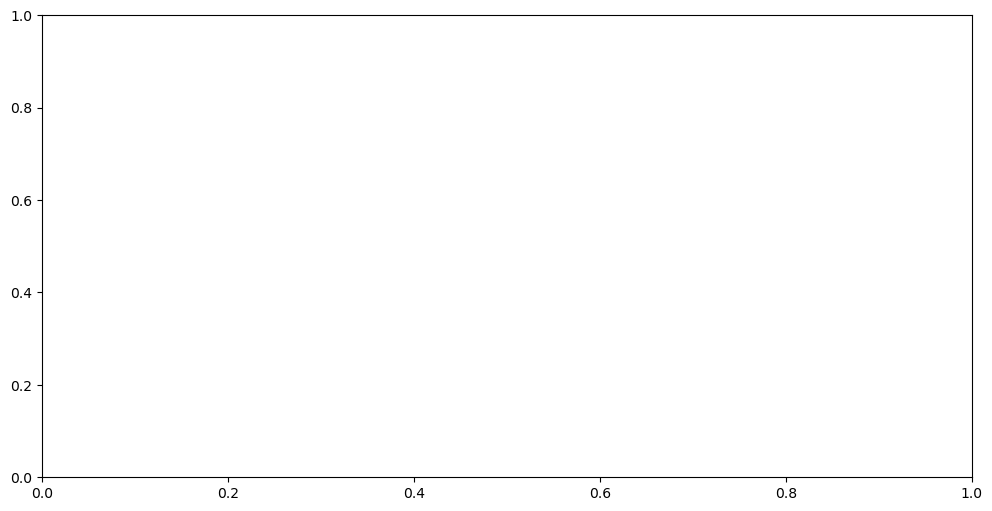

In [162]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

#change background colours
fig.set_facecolor('#343434')
ax.set_facecolor('#343434')


# Plot the xG for each team by half
# We want to make it so the lines both start at 0

for team in df['Squad'].unique():
    
    team_df = df[df['Squad'] == team]
    
    # add a 0 xG row at the start of the match
    team_df = pd.concat([pd.DataFrame({'Squad': team, 'Minute': 0, 'xG': 0, 'Outcome': 'Goal', 'cumulative_xG': 0, 'half': 1}, index=[0]), team_df])
    
    # Also add a row at the beginning of the second half to make the lines start where the first half ended
    team_df = pd.concat([team_df[team_df['half'] == 1], pd.DataFrame({'Squad': team, 'Minute': 48, 'xG': 0, 'Outcome': 'Goal', 'cumulative_xG': team_df[team_df['half'] == 1]['cumulative_xG'].iloc[-1], 'half': 2}, index=[0]), team_df[team_df['half'] == 2]])

    for half in team_df['half'].unique():
        half_df = team_df[team_df['half'] == half]
        ax.plot(
            half_df['Minute'], 
            half_df['cumulative_xG'], 
            label=team, 
            drawstyle='steps-post',
            c=HOME_COLOR if team == 'Pride' else AWAY_COLOR
        )   
        

# We Can add a scatter plot to show the goals
for team in df['Squad'].unique():
    team_df = df[(df['Squad'] == team) & (df['Outcome'] == 'Goal')].to_dict(orient='records')
    for x in team_df:
        ax.scatter(
            x['Minute'], 
            x['cumulative_xG'], 
            c='white',
            edgecolor=HOME_COLOR if team == 'Pride' else  AWAY_COLOR,
            s=100,
            # We want the goals to be on top of the lines
            zorder=5
        )
        
        # add a label to the goals for the player who scored
#         ax.text(
#             x['Minute'], 
#             x['cumulative_xG'] - .07, 
#             #x['Player'],
#             f"{x['Player']} ({x['Minute']}', xG: {x['cumulative_xG']:.2f})",
#             ha='center', 
#             va='center', 
#             fontfamily='monospace', 
#             fontsize=10,
#             zorder=12
#         )
        #add label for the goals
        ax.annotate(
            f"{x['Player']} {x['Minute']}'",
            xy=(x['Minute'], x['cumulative_xG']),  # Point to the goal
            xytext=(x['Minute'] - 4.4, x['cumulative_xG'] + 0.15),  # Position the text
            ha='center',
            va='center',
            fontfamily='monospace',
            fontsize=10,
            zorder=12,
            color='#EEEEEE',
            arrowprops=dict(arrowstyle='-', color='#EEEEEE')
        )
        
        #add label for xG
       
        
# Let's label the x axis with first and second half
ax.set_xticks([0, 15, 30, 45, 60, 75, 90])
ax.set_xticklabels(['0\'', '15\'', '30\'', '45\'', '60\'', '75\'', '90\''], color='#EEEEEE')
ax.set_xlabel('Minute', fontfamily='monospace', fontsize=12, color='#EEEEEE', fontweight='bold')

# Let's label the y axis with the cumulative xG
ax.set_ylabel('Cumulative xG', fontfamily='monospace', fontsize=12, fontweight='bold', color='#EEEEEE')

#add grids
ax.grid(ls='solid',lw=.5,color='#EEEEEE',which='both',zorder=1)

#add dotted line to separate halves
ax.axvline(x=47, ls='dashdot', color='#EEEEEE', lw=.5)

# Let's get rid of the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#change axis label colours
ax.xaxis.label.set_color('#EEEEEE')
ax.yaxis.label.set_color('#EEEEEE')

#change axis colours
ax.spines['left'].set_color('#EEEEEE')
ax.spines['bottom'].set_color('#EEEEEE')
ax.tick_params(axis='x', colors='#EEEEEE')
ax.tick_params(axis='y', colors='#EEEEEE')

#add titles
# fig.suptitle("Angel City (3 - 2) Racing Louisville", color='#EEEEEE',
#             fontsize=18)


# # Let's change the color of the title to show which team is which using the highlight-text package
from highlight_text import fig_text

fig_text(
    0.5,
    0.95,
    '<Orlando Pride (6> - <0) Utah Royals>', 
    fontsize=18, 
    ha='center', 
    va='center',
    color='#EEEEEE',
    ax=ax, 
    fontproperties='monospace',
    fontweight='bold',
    highlight_textprops=[{'color': HOME_COLOR}, {'color': AWAY_COLOR}]
)


fig_text(
    0.512,
    0.89,
    '<3.3> (xG) <0.4>', 
    fontsize=16, 
    ha='center', 
    va='center', 
    ax=ax, 
    color='#EEEEEE',
    fontproperties='monospace',
    fontweight='semibold',
    highlight_textprops=[{'color': HOME_COLOR}, {'color': AWAY_COLOR}]
)


# fig_text(
#     0.448,
#     0.89,
#     '<1.4> (xG) <0.5>', 
#     fontsize=14, 
#     ha='center', 
#     va='center', 
#     ax=ax, 
#     fontproperties='monospace',
#     fontweight='semibold',
#     highlight_textprops=[{'color': HOME_COLOR}, {'color': AWAY_COLOR}]
# )


# Now let's add a twitter @ to the bottom left of the plot
fig.text(
    0.1, 
    0.00, 
    '@freddys_canvas/twitter \n Data: FBREF', 
    fontsize=10, 
    fontstyle='oblique', 
    fontfamily='monospace', 
    color='#EEEEEE'
)

In [159]:
#save image: C:/Users/fredd\OneDrive/Pictures/data-vizes/xG-plots
fig.savefig('C:/Users/fredd/OneDrive/Pictures/data-vizes/xG-plots/pride-royals.png', dpi=300, bbox_inches='tight')